### We have the min and max temperatures in a city In India for each months of the year.We would like to find a function to describe this and show it graphically, the datasetgiven below.

### Task

1. fitting it to the periodic function
2. plot the fit
#### Data
- Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
- Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import pandas as pd

In [17]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
print(months)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


Text(0, 0.5, 'Temperature (degree C)')

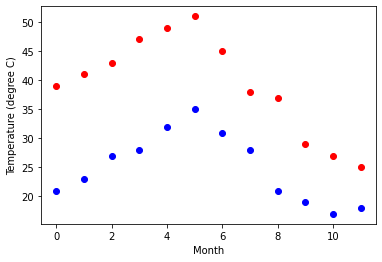

In [9]:
plt.figure()
plt.plot(months, Max, 'ro')

plt.plot(months, Min, 'bo')
plt.xlabel('Month')
plt.ylabel("Temperature (degree C)")

In [32]:
def yearly_temps(times, avg,  ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

    
    
res_max, cov_max = curve_fit(yearly_temps, months, Max)
res_min, cov_min = curve_fit(yearly_temps, months, Min)

In [33]:
print("res_max" , res_max)
print("res_min" , res_min)
print("\n", cov_max)


res_max [39.88861733 10.59083164 -4.16629844]
res_min [25.55626461 -7.74472961  0.93101294]

 [[ 1.28972691  0.14357376 -0.02263974]
 [ 0.14357376  2.5700972   0.03276365]
 [-0.02263974  0.03276365  0.07074286]]


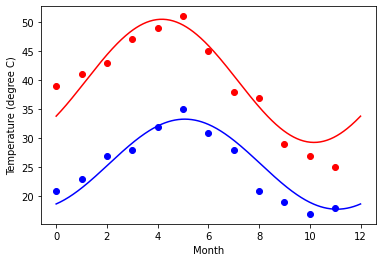

In [34]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel("Temperature (degree C)")
plt.show()


### Matplotlib:
#### This assignment is for visualization using matplotlib:
#### data to use: url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
- titanic = pd.read_csv(url)
#### Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [123]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [124]:
titanic = pd.read_csv(url)

In [125]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [126]:
titanic_maleFemale = titanic['sex'].value_counts()

In [127]:
titanic_maleFemale

male      843
female    466
Name: sex, dtype: int64

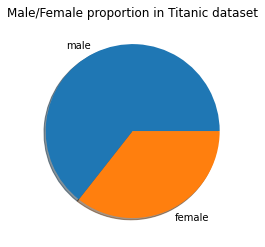

In [128]:
plt.pie(titatic_maleFemale.values, labels =titanic_maleFemale.index, shadow=True)
plt.title("Male/Female proportion in Titanic dataset")
plt.show()

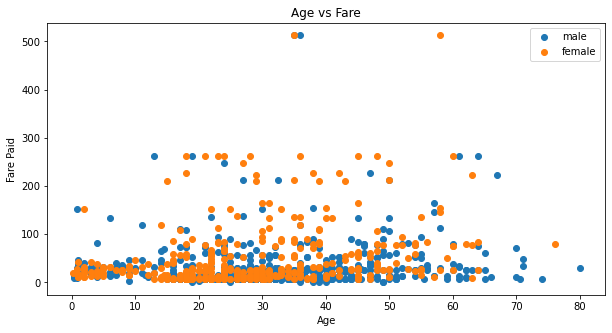

In [129]:
titanic = titanic[['age', 'fare', 'sex']]

df_male = titanic[titanic['sex']=='male']
df_female = titanic[titanic['sex']=='female']

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(dfmale['age'], dfmale['fare'], label='male')
ax.scatter(dffemale['age'], dffemale['fare'], label='female')

plt.title("Age vs Fare")
plt.xlabel('Age')
plt.ylabel('Fare Paid')
ax.legend()

Text(0, 0.5, 'Fare Paid')

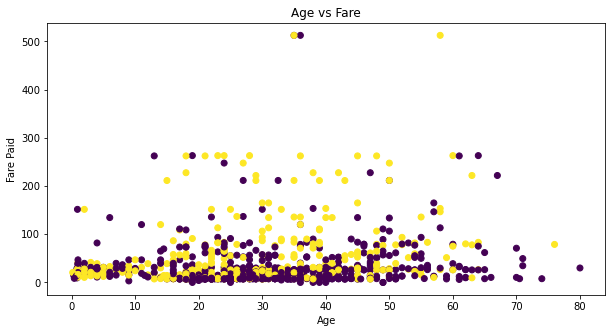

In [131]:
dict_male_female = {'female': 1, 'male': 0}
titanic['male_female'] = titanic['sex'].map(dict_male_female)

plt.figure(figsize=(10,5))
plt.scatter(titanic['age'], titanic['fare'], c= titanic['male_female'])
plt.title("Age vs Fare")
plt.xlabel('Age')
plt.ylabel('Fare Paid')